In [43]:
# speedup of resnet
import pandas as pd

path_ecr = "singleECR.txt"
path_pecr = "batchedECR.txt"

time_ecr = pd.read_csv(path_ecr, header = None, dtype = float)
time_pecr = pd.read_csv(path_pecr, header = None, dtype = float)

time_ocpa_ecr = []
time_ocpa_pecr = []
for i in range(0, 16):
    time_ocpa_ecr.append(time_ecr.iat[i, 0])
for i in range(0,16):
    time_ocpa_pecr.append(time_pecr.iat[i, 0])

In [44]:
path_cu_gemm = "cuDNN_gemm.txt"
path_cu_imp = "cuDNN_imp_gemm.txt"
path_cu_fft = "cuDNN_fft.txt"

time_gemm = pd.read_csv(path_cu_gemm, header=None, dtype=float)
time_imp = pd.read_csv(path_cu_imp, header=None, dtype=float)
time_fft = pd.read_csv(path_cu_fft, header=None, dtype=float)

time_cudnn_gemm = []
time_cudnn_imp = []
time_cudnn_fft = []

for i in range(0, 16):
    time_cudnn_gemm.append(time_gemm.iat[i, 0])
for i in range(0, 16):
    time_cudnn_imp.append(time_imp.iat[i, 0])
for i in range(0, 16):
    time_cudnn_fft.append(time_fft.iat[i, 0])


print("CUDNN GEMM")
print(time_cudnn_gemm)
print("CUDNN IMPLICIT GEMM")
print(time_cudnn_imp)
print("CUDNN FFT")
print(time_cudnn_fft)

CUDNN GEMM
[0.638496, 0.65792, 0.540864, 0.536704, 0.538976, 0.592352, 0.538432, 0.552, 0.526624, 0.52384, 0.538048, 0.50368, 0.541984, 0.505568, 0.517024, 0.510496]
CUDNN IMPLICIT GEMM
[0.743232, 0.668064, 0.547104, 0.550016, 0.567904, 0.50064, 0.560448, 0.712832, 0.512192, 0.55264, 0.522688, 0.528704, 0.52896, 0.72224, 0.524544, 0.529728]
CUDNN FFT
[1.4609, 1.4679, 0.763808, 0.745088, 0.627584, 0.587456, 0.584064, 0.5936, 0.557632, 0.634592, 0.885152, 0.554272, 0.57088, 0.56496, 0.540864, 0.543488]


In [45]:
times_cudnn_gemm_vs_ecr = []
times_cudnn_imp_vs_ecr = []
times_cudnn_fft_vs_ecr = []

times_cudnn_gemm_vs_pecr = []
times_cudnn_imp_vs_pecr = []
times_cudnn_fft_vs_pecr = []

for i in range(0, 16):
    times_cudnn_gemm_vs_ecr.append(time_cudnn_gemm[i]/time_ocpa_ecr[i])
    times_cudnn_gemm_vs_pecr.append(time_cudnn_gemm[i]/time_ocpa_pecr[i])

for i in range(0,16):
    times_cudnn_imp_vs_ecr.append(time_cudnn_imp[i]/time_ocpa_ecr[i])
    times_cudnn_imp_vs_pecr.append(time_cudnn_imp[i]/time_ocpa_pecr[i])

for i in range(0, 16):
    times_cudnn_fft_vs_ecr.append(time_cudnn_fft[i]/time_ocpa_ecr[i])
    times_cudnn_fft_vs_pecr.append(time_cudnn_fft[i]/time_ocpa_pecr[i])

print("SPEED UP VALUES OF ECR OVER CUDNN GEMM")
print(times_cudnn_gemm_vs_ecr)
print("SPEED UP VALUES OF ECR OVER CUDNN IMPLICIT GEMM")
print(times_cudnn_imp_vs_ecr)
print("SPEED UP VALUES OF ECR OVER CUDNN FFT")
print(times_cudnn_fft_vs_ecr)

print("SPEED UP VALUES OF PECR OVER CUDNN GEMM")
print(times_cudnn_gemm_vs_pecr)
print("SPEED UP VALUES OF PECR OVER CUDNN IMPLICIT GEMM")
print(times_cudnn_imp_vs_pecr)
print("SPEED UP VALUES OF PECR OVER CUDNN FFT")
print(times_cudnn_fft_vs_pecr)

SPEED UP VALUES OF ECR OVER CUDNN GEMM
[2.2268973214285714, 2.0539460539460537, 2.454189051836794, 2.675386824054873, 3.083104521325279, 3.482129420617005, 2.972791519434629, 3.2176832680470064, 2.375433025404157, 3.159621694653542, 3.3494023904382466, 3.1033123028391167, 3.3518701761329903, 3.070151574038088, 3.2153233830845775, 3.1286526769954888]
SPEED UP VALUES OF ECR OVER CUDNN IMPLICIT GEMM
[2.5921875, 2.085614385614386, 2.4825032670248297, 2.741745094911469, 3.2485813655500637, 2.943002257336343, 3.0943462897526497, 4.155194926319717, 2.310334872979215, 3.3333333333333335, 3.253784860557769, 3.2574921135646684, 3.271323965960815, 4.385930820054411, 3.2620895522388063, 3.2465189252794664]
SPEED UP VALUES OF ECR OVER CUDNN FFT
[5.095214843750001, 4.582604895104895, 3.4658051401190653, 3.7141489870792785, 3.5899688815669046, 3.4533483822422872, 3.2247349823321554, 3.460175340421563, 2.5153002309468824, 3.827639451843274, 5.510159362549801, 3.4150236593059935, 3.5305758955076194, 3.

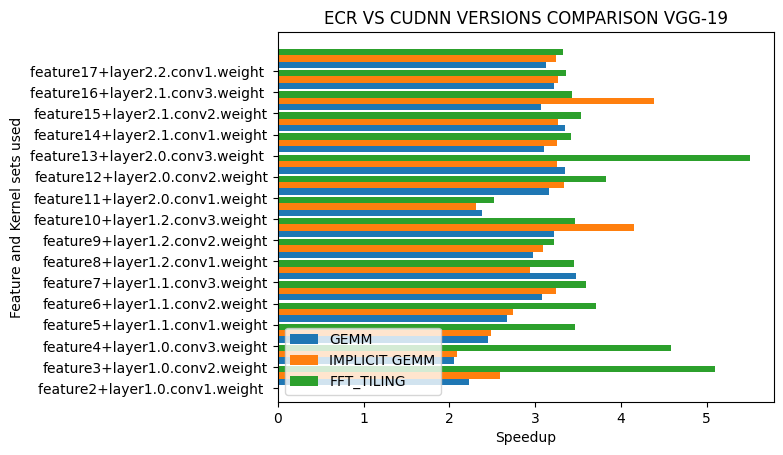

In [46]:
import numpy as np
import matplotlib.pyplot as plt 

x_axis = np.arange(16)
feature_and_kernels_used = ["feature2+layer1.0.conv1.weight ","feature3+layer1.0.conv2.weight",
"feature4+layer1.0.conv3.weight",
"feature5+layer1.1.conv1.weight",
"feature6+layer1.1.conv2.weight",
"feature7+layer1.1.conv3.weight",
"feature8+layer1.2.conv1.weight",
"feature9+layer1.2.conv2.weight",
"feature10+layer1.2.conv3.weight",
"feature11+layer2.0.conv1.weight",
"feature12+layer2.0.conv2.weight",
"feature13+layer2.0.conv3.weight ",
"feature14+layer2.1.conv1.weight",
"feature15+layer2.1.conv2.weight",
"feature16+layer2.1.conv3.weight ",
"feature17+layer2.2.conv1.weight "]

# Horizontal bar charts
plt.barh(x_axis+0.30, times_cudnn_gemm_vs_ecr[:16],  height=0.3, label="GEMM")
plt.barh(x_axis+0.30*2, times_cudnn_imp_vs_ecr[:16], height=0.3, label="IMPLICIT GEMM")
plt.barh(x_axis+0.30*3, times_cudnn_fft_vs_ecr[:16], height=0.3, label="FFT_TILING")

# yticks
plt.yticks(x_axis, feature_and_kernels_used)


# add ylabel and xlabel
plt.title("ECR VS CUDNN VERSIONS COMPARISON VGG-19")
plt.ylabel("Feature and Kernel sets used")
plt.xlabel("Speedup")

# add legend 
plt.legend(loc=3)
# display chart
plt.show()

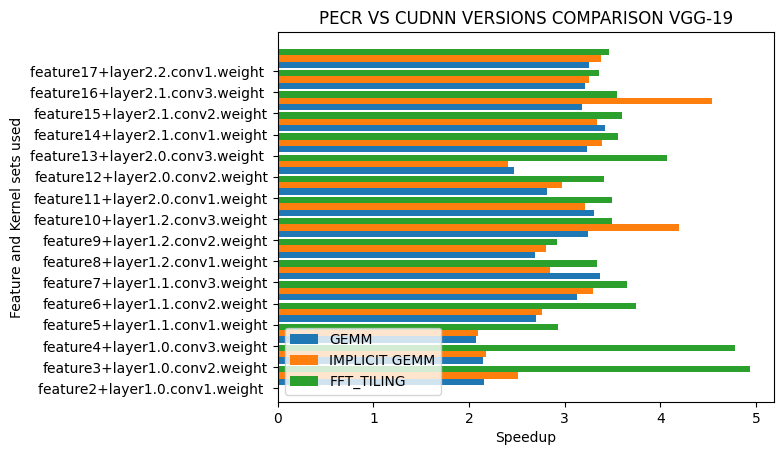

In [47]:
import numpy as np
import matplotlib.pyplot as plt 

x_axis = np.arange(16)
feature_and_kernels_used = ["feature2+layer1.0.conv1.weight ","feature3+layer1.0.conv2.weight",
"feature4+layer1.0.conv3.weight",
"feature5+layer1.1.conv1.weight",
"feature6+layer1.1.conv2.weight",
"feature7+layer1.1.conv3.weight",
"feature8+layer1.2.conv1.weight",
"feature9+layer1.2.conv2.weight",
"feature10+layer1.2.conv3.weight",
"feature11+layer2.0.conv1.weight",
"feature12+layer2.0.conv2.weight",
"feature13+layer2.0.conv3.weight ",
"feature14+layer2.1.conv1.weight",
"feature15+layer2.1.conv2.weight",
"feature16+layer2.1.conv3.weight ",
"feature17+layer2.2.conv1.weight "]

# Horizontal bar charts
plt.barh(x_axis+0.30, times_cudnn_gemm_vs_pecr[:16], height=0.3, label="GEMM")
plt.barh(x_axis+0.30*2, times_cudnn_imp_vs_pecr[:16], height=0.3, label="IMPLICIT GEMM")
plt.barh(x_axis+0.30*3, times_cudnn_fft_vs_pecr[:16], height=0.3, label="FFT_TILING")

# yticks
plt.yticks(x_axis, feature_and_kernels_used)


# add ylabel and xlabel
plt.title("PECR VS CUDNN VERSIONS COMPARISON VGG-19")
plt.ylabel("Feature and Kernel sets used")
plt.xlabel("Speedup")

# add legend 
plt.legend(loc=3)
# display chart
plt.show()